# Pour les boites de production d'animes, qu'est-ce qui pourrait caractériser la popularité de ces derniers afin de prévoir les tendances.

## On commence le projet par l'importation des librairies nécessaires au bon fonctionnement de ce dernier.

In [59]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### Importation du csv utilisé par nos diagrammes.

In [60]:
pd.set_option('display.max_columns', None)
df = pd.read_csv('anime_cleaned.csv')
df

,anime_id,title,title_english,title_japanese,title_synonyms,image_url,type,source,episodes,status,airing,aired_string,aired,duration,rating,score,scored_by,rank,popularity,members,favorites,background,premiered,broadcast,related,producer,licensor,studio,genre,opening_theme,ending_theme,duration_min,aired_from_year
0,11013,Inu x Boku SS,Inu X Boku Secret Service,妖狐×僕SS,Youko x Boku SS,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,12,Finished Airing,False,"Jan 13, 2012 to Mar 30, 2012","{'from': '2012-01-13', 'to': '2012-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,7.63,139250,1274.0,231,283882,2809,Inu x Boku SS was licensed by Sentai Filmworks...,Winter,Fridays at Unknown,"{'Adaptation': [{'mal_id': 17207, 'type': 'man...","Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen","['""Nirvana"" by MUCC']","['#1: ""Nirvana"" by MUCC (eps 1, 11-12)', '#2: ...",24.0,2012.0
1,2104,Seto no Hanayome,My Bride is a Mermaid,瀬戸の花嫁,The Inland Sea Bride,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,26,Finished Airing,False,"Apr 2, 2007 to Oct 1, 2007","{'from': '2007-04-02', 'to': '2007-10-01'}",24 min. per ep.,PG-13 - Teens 13 or older,7.89,91206,727.0,366,204003,2579,NaN,Spring,Unknown,"{'Adaptation': [{'mal_id': 759, 'type': 'manga...","TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen","['""Romantic summer"" by SUN&LUNAR']","['#1: ""Ashita e no Hikari (明日への光)"" by Asuka Hi...",24.0,2007.0
2,5262,Shugo Chara!! Doki,Shugo Chara!! Doki,しゅごキャラ！！どきっ,"Shugo Chara Ninenme, Shugo Chara! Second Year",https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,51,Finished Airing,False,"Oct 4, 2008 to Sep 25, 2009","{'from': '2008-10-04', 'to': '2009-09-25'}",24 min. per ep.,PG - Children,7.55,37129,1508.0,1173,70127,802,NaN,Fall,Unknown,"{'Adaptation': [{'mal_id': 101, 'type': 'manga...","TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo","['#1: ""Minna no Tamago (みんなのたまご)"" by Shugo Cha...","['#1: ""Rottara Rottara (ロッタラ ロッタラ)"" by Buono! ...",24.0,2008.0
3,721,Princess Tutu,Princess Tutu,プリンセスチュチュ,NaN,https://myanimelist.cdn-dena.com/images/anime/...,TV,Original,38,Finished Airing,False,"Aug 16, 2002 to May 23, 2003","{'from': '2002-08-16', 'to': '2003-05-23'}",16 min. per ep.,PG-13 - Teens 13 or older,8.21,36501,307.0,916,93312,3344,Princess Tutu aired in two parts. The first pa...,Summer,Fridays at Unknown,"{'Adaptation': [{'mal_id': 1581, 'type': 'mang...","Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy","['""Morning Grace"" by Ritsuko Okazaki']","['""Watashi No Ai Wa Chiisaikeredo"" by Ritsuko ...",16.0,2002.0
4,12365,Bakuman. 3rd Season,Bakuman.,バクマン。,Bakuman Season 3,https://myanimelist.cdn-dena.com/images/anime/...,TV,Manga,25,Finished Airing,False,"Oct 6, 2012 to Mar 30, 2013","{'from': '2012-10-06', 'to': '2013-03-30'}",24 min. per ep.,PG-13 - Teens 13 or older,8.67,107767,50.0,426,182765,2082,NaN,Fall,Unknown,"{'Adaptation': [{'mal_id': 9711, 'type': 'mang...","NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen","['#1: ""Moshimo no Hanashi (もしもの話)"" by nano.RIP...","['#1: ""Pride on Everyday"" by Sphere (eps 1-13)...",24.0,2012.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6663,37405,Dokidoki Little Ooyasan,NaN,dokidokiりとる大家さん,NaN,https://myanimelist.cdn-dena.com/images/anime/...,OVA,Other,0,Currently Airing,True,"May 25, 2018 to ?","{'from': '2018-05-25', 'to': None}",30 min.,Rx - Hentai,9.52,33,NaN,10273,357,21,NaN,NaN,NaN,[],NaN,NaN,Collaboration Works,Hentai,[],[],30.0,2018.0
6664,37886,Wo Shi Jiang Xiaobai (2018),I&#039;m Joybo OVA,我是江小白 小剧场,Wo Shi Jiang Xiao Bai: Xiao Ju Chang,https://myanimelist.cdn-dena.com/images/anime/...,ONA,Original,1,Finished Airing,False,"May 25, 2018","{'from': '2018-05-25', 'to': '2018-05-25'}

### Suppression des colonnes inutiles pour le dérouler du projet, et triage par Rank.

In [61]:
pd.set_option('display.max_columns', None)
df0 = df.drop(['title_english', 'title_japanese', 'title_synonyms', 'image_url', 'airing', 'aired_string', 'aired', 'duration', 'rating','background', 'broadcast', 'related', 'opening_theme', 'ending_theme'], axis = 1)
df0['aired_from_year'] = df0['aired_from_year'].astype(int)
df0 = df0.dropna(subset = ['rank'])
df0 = df0.set_index("rank")
df0

,anime_id,title,type,source,episodes,status,score,scored_by,popularity,members,favorites,premiered,producer,licensor,studio,genre,duration_min,aired_from_year
rank,,,,,,,,,,,,,,,,,,
1274.0,11013,Inu x Boku SS,TV,Manga,12,Finished Airing,7.63,139250,231,283882,2809,Winter,"Aniplex, Square Enix, Mainichi Broadcasting Sy...",Sentai Filmworks,David Production,"Comedy, Supernatural, Romance, Shounen",24.0,2012
727.0,2104,Seto no Hanayome,TV,Manga,26,Finished Airing,7.89,91206,366,204003,2579,Spring,"TV Tokyo, AIC, Square Enix, Sotsu",Funimation,Gonzo,"Comedy, Parody, Romance, School, Shounen",24.0,2007
1508.0,5262,Shugo Chara!! Doki,TV,Manga,51,Finished Airing,7.55,37129,1173,70127,802,Fall,"TV Tokyo, Sotsu",NaN,Satelight,"Comedy, Magic, School, Shoujo",24.0,2008
307.0,721,Princess Tutu,TV,Original,38,Finished Airing,8.21,36501,916,93312,3344,Summer,"Memory-Tech, GANSIS, Marvelous AQL",ADV Films,Hal Film Maker,"Comedy, Drama, Magic, Romance, Fantasy",16.0,2002
50.0,12365,Bakuman. 3rd Season,TV,Manga,25,Finished Airing,8.67,107767,426,182765,2082,Fall,"NHK, Shueisha",NaN,J.C.Staff,"Comedy, Drama, Romance, Shounen",24.0,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11126.0,37894,Ling Yu 4th Season,ONA,Novel,12,Finished Airing,7.53,17,12779,126,0,NaN,iQIYI,NaN,Haoliners Animation League,Fantasy,13.0,2016
12719.0,37886,Wo Shi Jiang Xiaobai (2018),ONA,Original,1,Finished Airing,0.00,0,10168,384,1,NaN,NaN,NaN,2:10 Animation,"Slice of Life, Drama, Romance",0.0,2018
10253.0,37255,Genki Genki Non-tan: Obake Mura Meiro,OVA,Original,1,Finished Airing,4.20,5,14257,37,0,NaN,NaN,NaN,Polygon Pictures,"Music, Kids",35.0,2015


## Création d'un premier diagramme, une boîte à moustache, afin d'afficher les statistiques des scores des animes.

### On commence par filtrer nos animes en question.

In [62]:
df1 = df0.drop(['type', 'source', 'episodes', 'status', 'popularity', 'members','favorites', 'premiered', 'producer', 'licensor', 'studio', 'genre', 'duration_min', 'aired_from_year'], axis = 1)
df1.sort_values('score', ascending=False)

,anime_id,title,score,scored_by
rank,,,,
1.0,5114,Fullmetal Alchemist: Brotherhood,9.25,733592
2.0,32281,Kimi no Na wa.,9.19,471398
3.0,28977,Gintama°,9.15,71751
4.0,30484,Steins;Gate 0,9.15,26739
5.0,9253,Steins;Gate,9.14,563857
...,...,...,...,...
10119.0,37859,Free! Movie 2: Timeless Medley - Yakusoku: Cha...,0.00,0
10120.0,37860,Free!: Take Your Marks: Character Butai Aisatsu,0.00,0
10587.0,37814,Inazuma Eleven Reloaded: Reformation of Soccer,0.00,0


### Puis création du diagramme.

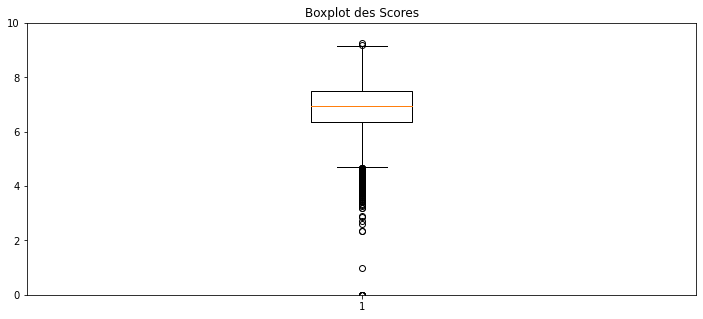

In [63]:
plt.figure(figsize = (12,5))
plt.boxplot(df1.score)
plt.title("Boxplot des Scores")
plt.ylim(0,10)
plt.show()

### Des valeurs abberentes sont visibles facilement à cause de certaines notations qui n'ont pas assez d'échantillon de personnes.
### Il ne manque plus qu'a les enlever et mettre la boîte à moustaches à l'horizontale. 

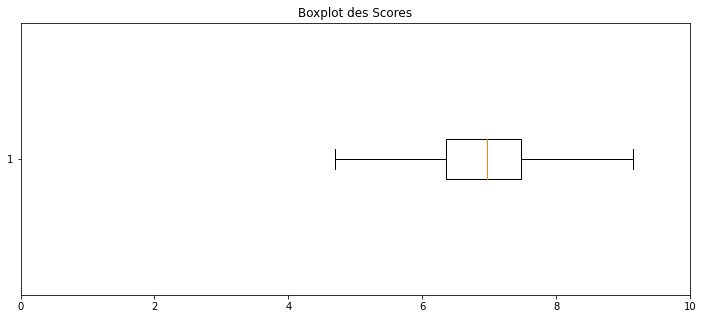

In [64]:
plt.figure(figsize = (12,5))
plt.boxplot(df1.score, showfliers=False, vert=False)
plt.title("Boxplot des Scores")
plt.xlim(0,10)
plt.show()

### On remarque très facilement que les notes, sans valeurs abberantes, oscillent entre 4.6 et 9.1 avec une moyenne de 6.9.

## Création d'un nuage de points selon les scores par année.

<AxesSubplot:xlabel='aired_from_year', ylabel='score'>

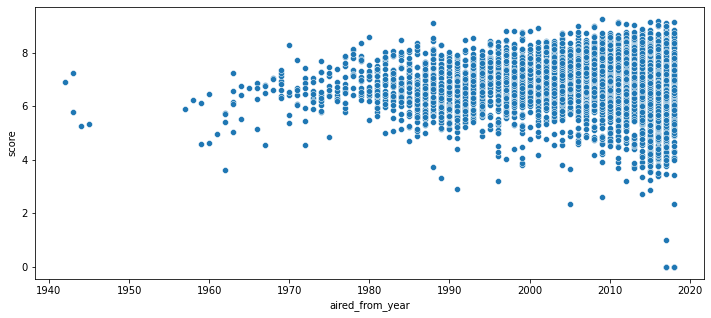

In [65]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df0, x = df0["aired_from_year"], y = df0["score"])

### Zoom de ce dernier mais sur les scores depuis les années 2000.

<AxesSubplot:xlabel='aired_from_year', ylabel='score'>

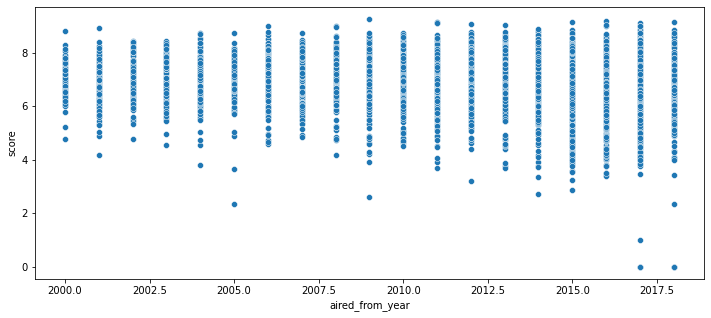

In [66]:
plt.figure(figsize = (12,5))
sns.scatterplot(data = df0[(df0["aired_from_year"] >= 2000)], x = "aired_from_year", y = "score")

## Création d'un tableau de moyennes par année.

In [69]:
df2 = df0.groupby(["aired_from_year"]).mean()
df2

,anime_id,episodes,score,scored_by,popularity,members,favorites,duration_min
aired_from_year,,,,,,,,
1942,23969.000000,1.000000,6.890000,9.000000,12255.000000,134.000000,0.000000,11.000000
1943,13980.500000,1.000000,6.515000,345.000000,10212.500000,666.500000,0.500000,12.500000
1944,7523.000000,1.000000,5.260000,95.000000,10539.000000,287.000000,0.000000,30.000000
1945,2765.000000,1.000000,5.330000,466.000000,8131.000000,1077.000000,2.000000,74.000000
1957,6993.000000,1.000000,5.880000,471.000000,8503.000000,884.000000,0.000000,13.000000
...,...,...,...,...,...,...,...,...
2014,23720.808933,12.076923,6.917742,39091.238213,3676.766749,74492.178660,916.024814,24.885691
2015,29439.511879,10.276458,6.755140,31368.060475,4489.576674,60422.274298,565.453564,24.342225
2016,32686.518315,9.948718,6.687729,22105.481685,4737.659341,46109.525641,510.849817,23.621795


### Création d'un graphique montrant l'évolution des scores par année.

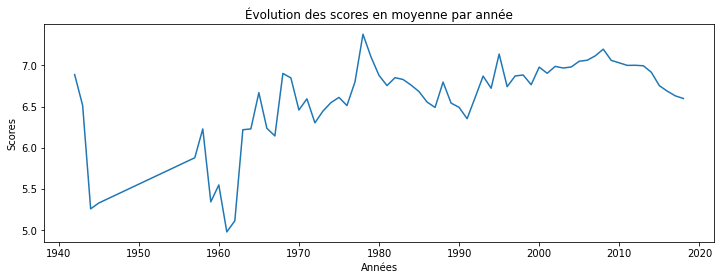

In [70]:
plt.figure(figsize=(12,4))
plt.plot(df2.index, df2.score)
plt.xlabel('Années')
plt.ylabel('Scores')
plt.title('Évolution des scores en moyenne par année');

### Création d'un graphique montrant l'évolution du classement de popularité par année.

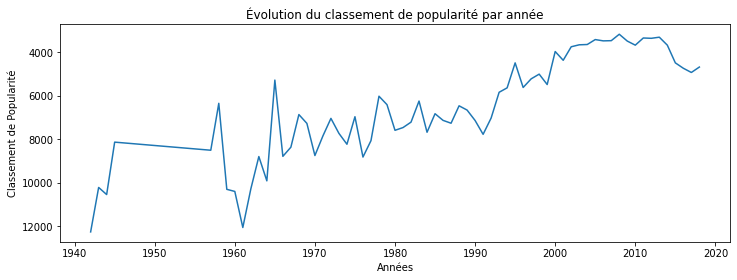

In [71]:
plt.figure(figsize=(12,4))
plt.plot(df2.index, df2.popularity)
plt.xlabel('Années')
plt.ylabel('Classement de Popularité')
plt.title('Évolution du classement de popularité par année');
plt.gca().invert_yaxis()


### On remarque que les graphiques se suivent bien qu'ils ne sont pas parfaitement identiques.

## Création d'un graphique représentant la densité des scores.

C:\Users\Admin\AppData\Roaming\Python\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='score', ylabel='Density'>

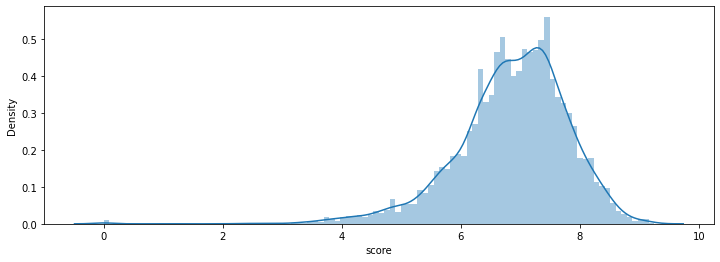

In [72]:
plt.figure(figsize=(12,4))
sns.distplot(df0.score, bins=100)

## Création d'un nuage de points montrant la corrélation entre le classement de popularité et le rang des animes.

<Figure size 1152x432 with 0 Axes>

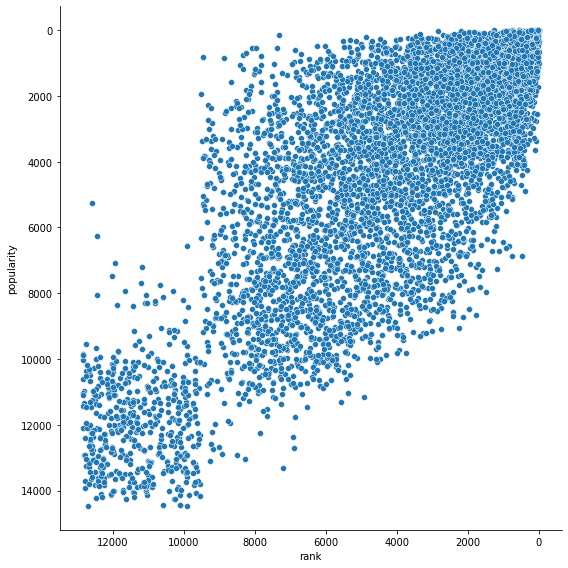

In [74]:
plt.figure(figsize=(16,6))
sns.relplot(x="rank", y="popularity", data = df0, height=8);
plt.gca().invert_yaxis()
plt.gca().invert_xaxis()

## Regroupement des 20 meilleurs studios selon le score moyen de leurs animes.

In [75]:
df3 = df0.groupby(['studio']).mean()
df3 = df3.sort_values('score', ascending=False).head(20)
df3

,anime_id,episodes,score,scored_by,popularity,members,favorites,duration_min,aired_from_year
studio,,,,,,,,,
"Artland, Magic Bus",820.000000,110.000000,9.110000,29036.0,671.0,124993.000000,8567.000000,26.0,1988.0
Studio Chizu,20580.000000,1.000000,8.635000,147708.5,315.0,262385.000000,4421.000000,117.5,2013.5
"J.C.Staff, Egg Firm",33933.500000,72.000000,8.615000,36726.0,949.5,102833.000000,1721.000000,14.5,2017.0
"Madhouse, Satelight, Graphinica",777.000000,10.000000,8.530000,221939.0,105.0,425255.000000,13450.000000,50.0,2006.0
"Xebec, AIC",12029.000000,26.000000,8.460000,21150.0,1282.0,63676.000000,1228.000000,25.0,2012.0
"Tezuka Productions, MAPPA",12531.000000,12.000000,8.440000,93986.0,390.0,192993.000000,4600.000000,22.0,2012.0
"Studio Ghibli, Studio Hibari",542.000000,1.000000,8.380000,129474.5,373.5,201954.500000,2272.500000,111.0,1986.5
Imagin,2966.000000,13.000000,8.340000,226529.0,100.0,442354.000000,13201.000000,24.0,2008.0
"Gainax, Tatsunoko Production",30.000000,26.000000,8.320000,364012.0,48.0,641101.000000,41098.000000,24.0,1995.0


## Création d'un histogramme selon la saison de parutions et le score des animes.

In [78]:
df4 = df0
df4 = df4.groupby(["premiered"]).mean()
df4

,anime_id,episodes,score,scored_by,popularity,members,favorites,duration_min,aired_from_year
premiered,,,,,,,,,
Fall,12668.119910,31.134615,7.079118,42991.432127,3529.858597,84945.032805,1645.820136,21.143382,2005.218326
Spring,12954.047904,31.061876,7.018044,37633.957086,3715.270459,75917.081836,1439.142715,21.047971,2006.294411
Summer,15602.992063,19.543651,6.971210,47790.382937,2773.682540,94191.428571,1152.539683,20.465278,2009.436508
Winter,14882.184028,26.925347,6.997240,37442.546875,3375.699653,75934.222222,913.758681,20.845747,2007.531250


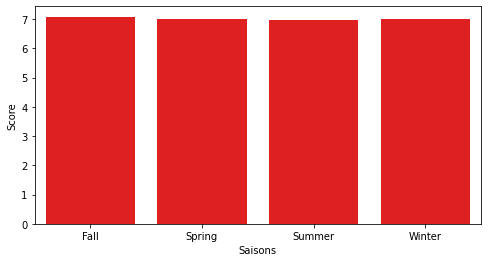

In [79]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = df4.index, y = df4.score, data=df4, color='red')
ax.set(xlabel='Saisons', ylabel='Score')
plt.show()

## Création d'un histogramme selon la source et le score des animes.

In [80]:
df5 = df0
df5 = df5.groupby(["source"]).mean()
df5

,anime_id,episodes,score,scored_by,popularity,members,favorites,duration_min,aired_from_year
source,,,,,,,,,
4-koma manga,19603.778351,12.252577,6.884381,22691.175258,4070.520619,46109.891753,386.190722,16.723196,2010.690722
Book,9733.068182,23.295455,6.838864,3771.909091,6539.704545,9460.181818,62.204545,46.886364,1991.886364
Card game,23204.630435,20.804348,6.721087,6211.304348,5214.326087,17573.173913,78.869565,27.347826,2013.456522
Digital manga,33064.000000,10.428571,5.610000,9412.000000,3571.285714,22769.571429,58.000000,6.714286,2016.142857
Game,17118.285377,14.202830,6.619717,10780.577830,4671.688679,22943.931604,114.966981,29.512068,2009.509434
Light novel,15995.090730,9.173570,7.250651,62055.238659,1938.065089,117173.295858,1287.323471,27.713051,2010.449704
Manga,12753.750000,17.641250,7.142996,29603.406667,3722.307083,57931.537500,904.750000,31.103437,2005.337917
Music,25322.381818,3.363636,6.069636,7412.200000,7964.927273,14827.236364,120.600000,10.745455,2010.563636
Novel,14775.971631,13.929078,6.994504,22058.865248,5218.698582,45428.081560,683.531915,41.273050,2002.457447


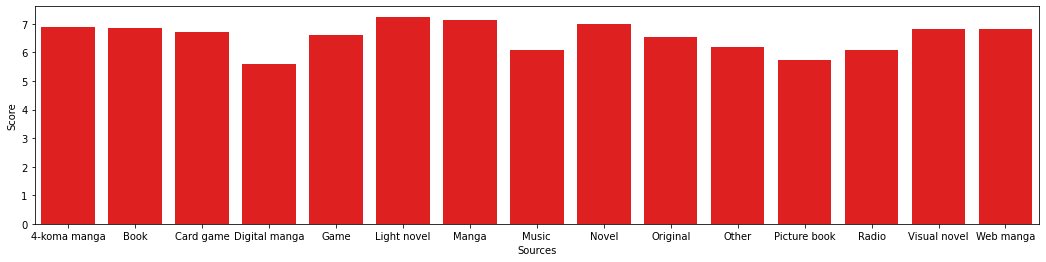

In [81]:
plt.figure(figsize=(18,4))
ax = sns.barplot(x = df5.index, y = df5.score, data=df5, color='red')
ax.set(xlabel='Sources', ylabel='Score')
plt.show()

## Création d'un histogramme selon le type et le score des animes.

In [82]:
df6 = df0
df6 = df6.groupby(["type"]).mean()
df6

,anime_id,episodes,score,scored_by,popularity,members,favorites,duration_min,aired_from_year
type,,,,,,,,,
Movie,14257.873208,1.076075,7.100728,20290.169791,4607.728776,36960.320838,312.562293,71.901488,2004.542448
Music,24459.755102,1.295918,5.965510,2894.683673,8584.918367,4979.316327,28.500000,5.340986,2009.612245
ONA,28832.899015,8.940887,6.064877,4468.115764,7651.990148,10043.847291,60.753695,8.465271,2014.275862
OVA,10291.462926,2.814629,6.731904,9920.268537,4782.925852,19534.053106,108.602204,30.627255,2003.107214
Special,18831.478873,2.773564,6.717356,7963.093174,5203.075840,15422.078007,30.307692,19.470603,2009.442037
TV,13705.891946,28.307383,7.020124,40728.846980,3462.244295,81336.742617,1343.685235,20.875179,2006.765772


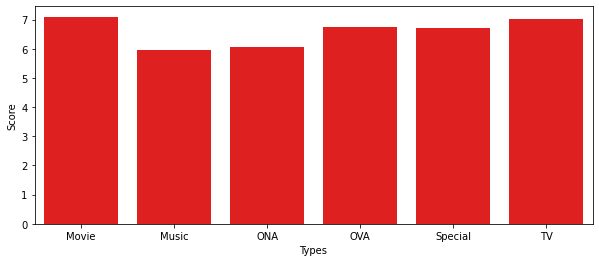

In [83]:
plt.figure(figsize=(10,4))
ax = sns.barplot(x = df6.index, y = df6.score, data=df6, color='red')
ax.set(xlabel='Types', ylabel='Score')
plt.show()

## Création d'un histogramme selon le status et le score des animes.

In [84]:
df7 = df0
df7 = df7.groupby(["status"]).mean()
df7

,anime_id,episodes,score,scored_by,popularity,members,favorites,duration_min,aired_from_year
status,,,,,,,,,
Currently Airing,32264.926380,5.834356,6.407607,7899.08589,6059.030675,31402.294479,630.343558,14.725153,2015.582822
Finished Airing,14680.730851,15.206863,6.876144,25668.51423,4396.309156,50265.615222,707.228492,28.869762,2006.553261


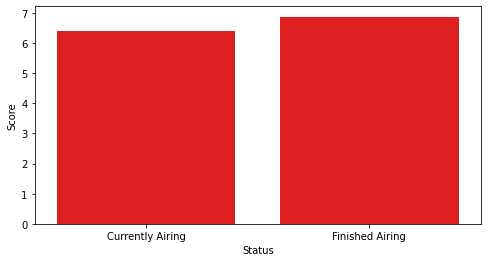

In [85]:
plt.figure(figsize=(8,4))
ax = sns.barplot(x = df7.index, y = df7.score, data=df7, color='red')
ax.set(xlabel='Status', ylabel='Score')
plt.show()

## Création d'une Heatmap.

<AxesSubplot:>

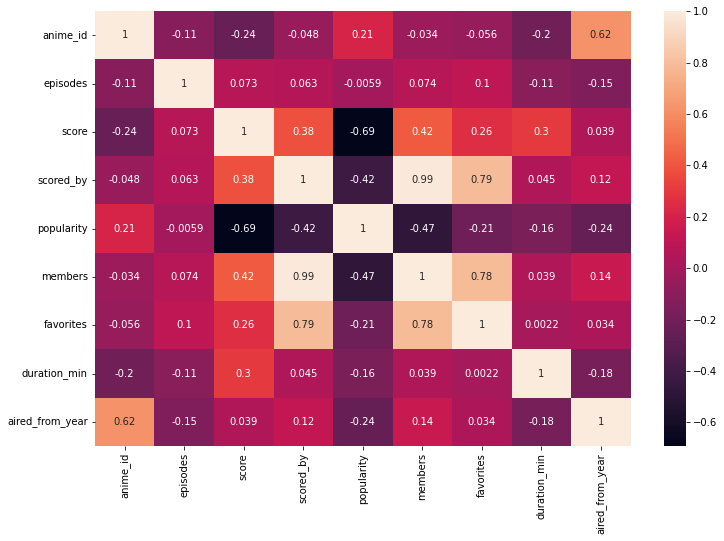

In [86]:
plt.figure(figsize= (12,8))
sns.heatmap(data = df0.corr(),annot=True)

Grâce à l'analyse de toutes les données sous forme de tableau et graphique on déduit facilement que la popularité d'un anime n'est pas facilement caractérisable. Il faudrait sans doute plus se pencher sois sur les thèmes abordés, mais en vue des autres données, il n'aura sans doute aucune influence. 
Le meilleur moyens de prédire la popularité serait d'obtenir cette dernière mais de la source.